<h3>Predicting Customer Churn in Telecommunication Industry</h3>

<h4>Problem Statement:</h4>
Customer retention is challenge for sustained growth and profitability. With increasing competition and changing customer preferences, it is essential for telecommunication companies to proactively identify and retain customers at risk of churning.

<h4>Research Statement </h4>
Develop a data analytics model to predict customer churn in a telecommunications company using historical data and customer attributes, aiming to implement proactive retention strategies and minimize churn rates

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
churn_df = pd.read_csv('telecom_customer_churn.csv')
churn_df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [3]:
churn_df['Churn Category'].unique()

array([nan, 'Competitor', 'Dissatisfaction', 'Other', 'Price', 'Attitude'],
      dtype=object)

In [4]:
churn_df['Churn Reason'].unique()

array([nan, 'Competitor had better devices', 'Product dissatisfaction',
       'Network reliability', 'Limited range of services',
       'Competitor made better offer', "Don't know",
       'Long distance charges', 'Attitude of service provider',
       'Attitude of support person',
       'Competitor offered higher download speeds',
       'Competitor offered more data',
       'Lack of affordable download/upload speed', 'Deceased', 'Moved',
       'Service dissatisfaction', 'Price too high',
       'Lack of self-service on Website',
       'Poor expertise of online support', 'Extra data charges',
       'Poor expertise of phone support'], dtype=object)

In [5]:
churn_df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [6]:
directory_df = pd.read_csv('telecom_zipcode_population.csv',encoding='latin-1')
directory_df.head()

,Zip Code,Population
0,90001,54492
1,90002,44586
2,90003,58198
3,90004,67852
4,90005,43019


<h5>Exploratory data analysis</h5>

In [7]:
directory_df.shape

(1671, 2)

In [8]:
churn_df.shape

(7043, 38)

In [9]:
key_attributes = ['Tenure in Months','Offer','Monthly Charge','Total Charges','Internet Service','Online Security',
    'Online Backup','Device Protection Plan','Premium Tech Support','Contract','Paperless Billing','Churn Reason','Customer Status', 'Churn Category'
]
churn_key_attributes = churn_df[key_attributes].copy()
churn_key_df = pd.DataFrame(churn_key_attributes)
churn_key_df.head()

,Tenure in Months,Offer,Monthly Charge,Total Charges,Internet Service,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Contract,Paperless Billing,Churn Reason,Customer Status,Churn Category
0,9,NaN,65.6,593.30,Yes,No,Yes,No,Yes,One Year,Yes,NaN,Stayed,NaN
1,9,NaN,-4.0,542.40,Yes,No,No,No,No,Month-to-Month,No,NaN,Stayed,NaN
2,4,Offer E,73.9,280.85,Yes,No,No,Yes,No,Month-to-Month,Yes,Competitor had better devices,Churned,Competitor
3,13,Offer D,98.0,1237.85,Yes,No,Yes,Yes,No,Month-to-Month,Yes,Product dissatisfaction,Churned,Dissatisfaction
4,3,NaN,83.9,267.40,Yes,No,No,No,Yes,Month-to-Month,Yes,Network reliability,Churned,Dissatisfaction


In [10]:
churn_key_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Tenure in Months        7043 non-null   int64  
 1   Offer                   3166 non-null   object 
 2   Monthly Charge          7043 non-null   float64
 3   Total Charges           7043 non-null   float64
 4   Internet Service        7043 non-null   object 
 5   Online Security         5517 non-null   object 
 6   Online Backup           5517 non-null   object 
 7   Device Protection Plan  5517 non-null   object 
 8   Premium Tech Support    5517 non-null   object 
 9   Contract                7043 non-null   object 
 10  Paperless Billing       7043 non-null   object 
 11  Churn Reason            1869 non-null   object 
 12  Customer Status         7043 non-null   object 
 13  Churn Category          1869 non-null   object 
dtypes: float64(2), int64(1), object(11)
memo

In [11]:
categorical_cols = ['Offer', 'Internet Service', 'Online Security', 'Online Backup',
                    'Device Protection Plan', 'Premium Tech Support', 'Contract', 
                    'Paperless Billing', 'Churn Reason','Customer Status', 'Churn Category']
churn_key_attributes[categorical_cols] = churn_key_attributes[categorical_cols].astype('category')
churn_key_attributes['Total Charges'] = churn_key_attributes['Total Charges'].astype('int64')
print(churn_key_attributes.dtypes)


Tenure in Months             int64
Offer                     category
Monthly Charge             float64
Total Charges                int64
Internet Service          category
Online Security           category
Online Backup             category
Device Protection Plan    category
Premium Tech Support      category
Contract                  category
Paperless Billing         category
Churn Reason              category
Customer Status           category
Churn Category            category
dtype: object


In [12]:
churn_key_df.isnull().sum()

Tenure in Months             0
Offer                     3877
Monthly Charge               0
Total Charges                0
Internet Service             0
Online Security           1526
Online Backup             1526
Device Protection Plan    1526
Premium Tech Support      1526
Contract                     0
Paperless Billing            0
Churn Reason              5174
Customer Status              0
Churn Category            5174
dtype: int64

In [13]:
print('Offer                  : ',(3877/len(churn_key_df))*100)
print('Online Security        : ',(1526/len(churn_key_df))*100)
print('Online Backup          : ',(1526/len(churn_key_df))*100)
print('Device Protection Plan : ',(1526/len(churn_key_df))*100)
print('Premium Tech Support   : ',(1526/len(churn_key_df))*100)
print('Churn Reason           : ',(5174/len(churn_key_df))*100)
print('Churn Category         : ',(5174/len(churn_key_df))*100)

Offer                  :  55.047564958114435
Online Security        :  21.666903308249324
Online Backup          :  21.666903308249324
Device Protection Plan :  21.666903308249324
Premium Tech Support   :  21.666903308249324
Churn Reason           :  73.4630129206304
Churn Category         :  73.4630129206304


In [14]:
# Imputation for numerical columns
numerical_cols = ['Tenure in Months', 'Monthly Charge', 'Total Charges']
for col in numerical_cols:
    churn_key_df[col].fillna(churn_key_df[col].mean(), inplace=True)

# Imputation for categorical columns
categorical_cols = ['Offer', 'Internet Service', 'Online Security', 'Online Backup', 
                    'Device Protection Plan', 'Premium Tech Support', 'Contract', 'Paperless Billing']
for col in categorical_cols:
    churn_key_df[col].fillna(churn_key_df[col].mode()[0], inplace=True)

# Drop 'Churn Reason' column if it exists
if 'Churn Reason' in churn_key_df.columns:
    churn_key_df.drop(columns=['Churn Reason'], inplace=True)
if 'Churn Category' in churn_key_df.columns:
    churn_key_df.drop(columns=['Churn Category'], inplace=True)

In [15]:
churn_key_df.isnull().sum()

Tenure in Months          0
Offer                     0
Monthly Charge            0
Total Charges             0
Internet Service          0
Online Security           0
Online Backup             0
Device Protection Plan    0
Premium Tech Support      0
Contract                  0
Paperless Billing         0
Customer Status           0
dtype: int64

In [16]:
churn_key_df.head()

,Tenure in Months,Offer,Monthly Charge,Total Charges,Internet Service,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Contract,Paperless Billing,Customer Status
0,9,Offer B,65.6,593.30,Yes,No,Yes,No,Yes,One Year,Yes,Stayed
1,9,Offer B,-4.0,542.40,Yes,No,No,No,No,Month-to-Month,No,Stayed
2,4,Offer E,73.9,280.85,Yes,No,No,Yes,No,Month-to-Month,Yes,Churned
3,13,Offer D,98.0,1237.85,Yes,No,Yes,Yes,No,Month-to-Month,Yes,Churned
4,3,Offer B,83.9,267.40,Yes,No,No,No,Yes,Month-to-Month,Yes,Churned


In [17]:
churn_key_df[churn_key_df.duplicated()].head()

,Tenure in Months,Offer,Monthly Charge,Total Charges,Internet Service,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Contract,Paperless Billing,Customer Status
817,1,Offer B,19.65,19.65,No,No,No,No,No,Month-to-Month,No,Joined
1676,1,Offer E,70.30,70.30,Yes,No,No,No,No,Month-to-Month,Yes,Churned
1761,1,Offer B,19.55,19.55,No,No,No,No,No,Month-to-Month,No,Joined
1794,1,Offer B,70.15,70.15,Yes,No,No,No,No,Month-to-Month,Yes,Churned
1829,1,Offer B,20.45,20.45,No,No,No,No,No,Month-to-Month,No,Joined


In [18]:
churn_key_df.drop_duplicates(inplace = True)

In [19]:
churn_key_df.shape

(6975, 12)

In [20]:
categorical_cols = ['Offer', 'Internet Service', 'Online Security', 'Online Backup',
                    'Device Protection Plan', 'Premium Tech Support', 'Contract', 
                    'Paperless Billing','Customer Status']
for col in categorical_cols:
    print("Distribution of", col)
    print(churn_key_attributes[col].value_counts(normalize=True))
    print()


Distribution of Offer
Offer
Offer B    0.260265
Offer E    0.254264
Offer D    0.190145
Offer A    0.164245
Offer C    0.131080
Name: proportion, dtype: float64

Distribution of Internet Service
Internet Service
Yes    0.783331
No     0.216669
Name: proportion, dtype: float64

Distribution of Online Security
Online Security
No     0.63404
Yes    0.36596
Name: proportion, dtype: float64

Distribution of Online Backup
Online Backup
No     0.559724
Yes    0.440276
Name: proportion, dtype: float64

Distribution of Device Protection Plan
Device Protection Plan
No     0.560993
Yes    0.439007
Name: proportion, dtype: float64

Distribution of Premium Tech Support
Premium Tech Support
No     0.629509
Yes    0.370491
Name: proportion, dtype: float64

Distribution of Contract
Contract
Month-to-Month    0.512566
Two Year          0.267358
One Year          0.220077
Name: proportion, dtype: float64

Distribution of Paperless Billing
Paperless Billing
Yes    0.592219
No     0.407781
Name: proportio

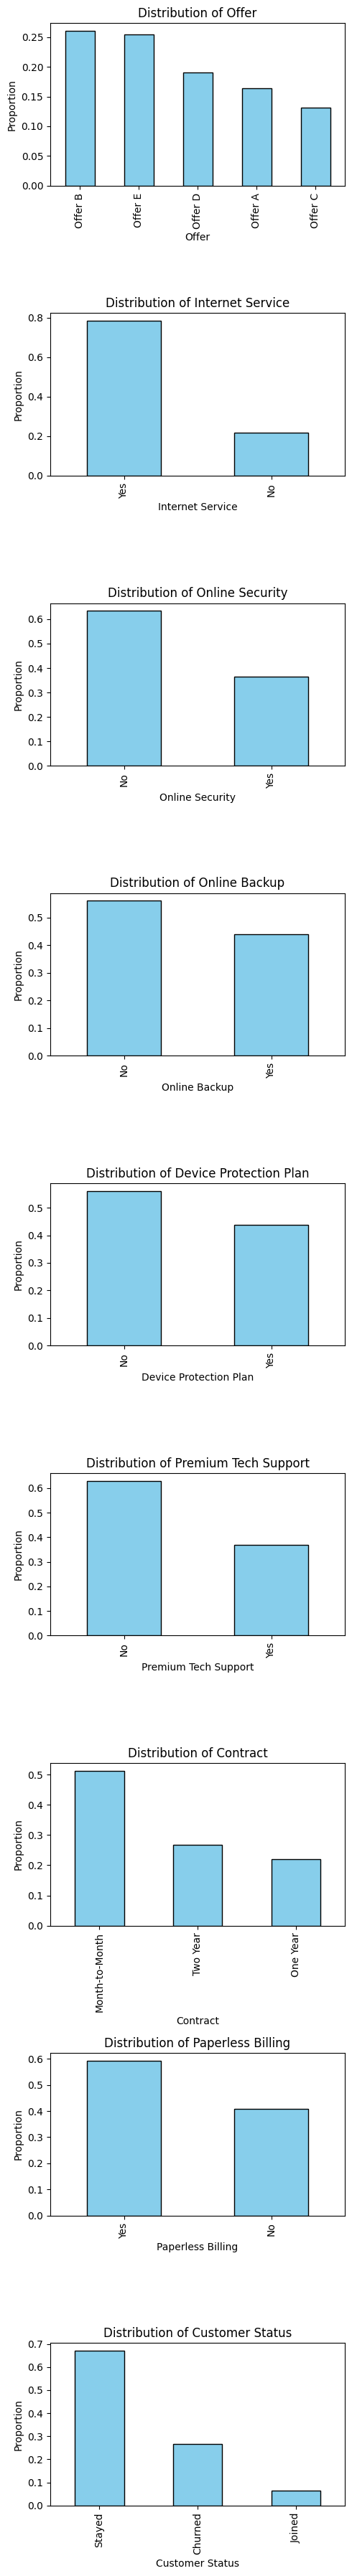

In [21]:
categorical_cols = ['Offer', 'Internet Service', 'Online Security', 'Online Backup',
                    'Device Protection Plan', 'Premium Tech Support', 'Contract', 
                    'Paperless Billing','Customer Status']

# Set up subplots
fig, axes = plt.subplots(nrows=len(categorical_cols), ncols=1, figsize=(5, 4*len(categorical_cols)))

# Plot proportions of each category for each categorical column
for i, col in enumerate(categorical_cols):
    proportions = churn_key_attributes[col].value_counts(normalize=True)
    proportions.plot(kind='bar', ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title('Distribution of ' + col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Proportion')

plt.tight_layout()
plt.show()

In [22]:
churn_key_df.describe()

,Tenure in Months,Monthly Charge,Total Charges
count,6975.000000,6975.000000,6975.000000
mean,32.692760,63.873692,2302.270493
std,24.463983,31.158276,2266.317231
min,1.000000,-10.000000,18.800000
25%,9.000000,33.600000,417.725000
50%,29.000000,70.200000,1414.800000
75%,56.000000,89.850000,3828.825000
max,72.000000,118.750000,8684.800000


In [23]:
churn_key_df = churn_key_df[churn_key_df['Monthly Charge'] > 0]

In [24]:
churn_key_df.head()

,Tenure in Months,Offer,Monthly Charge,Total Charges,Internet Service,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Contract,Paperless Billing,Customer Status
0,9,Offer B,65.6,593.30,Yes,No,Yes,No,Yes,One Year,Yes,Stayed
2,4,Offer E,73.9,280.85,Yes,No,No,Yes,No,Month-to-Month,Yes,Churned
3,13,Offer D,98.0,1237.85,Yes,No,Yes,Yes,No,Month-to-Month,Yes,Churned
4,3,Offer B,83.9,267.40,Yes,No,No,No,Yes,Month-to-Month,Yes,Churned
5,9,Offer E,69.4,571.45,Yes,No,No,No,Yes,Month-to-Month,Yes,Stayed


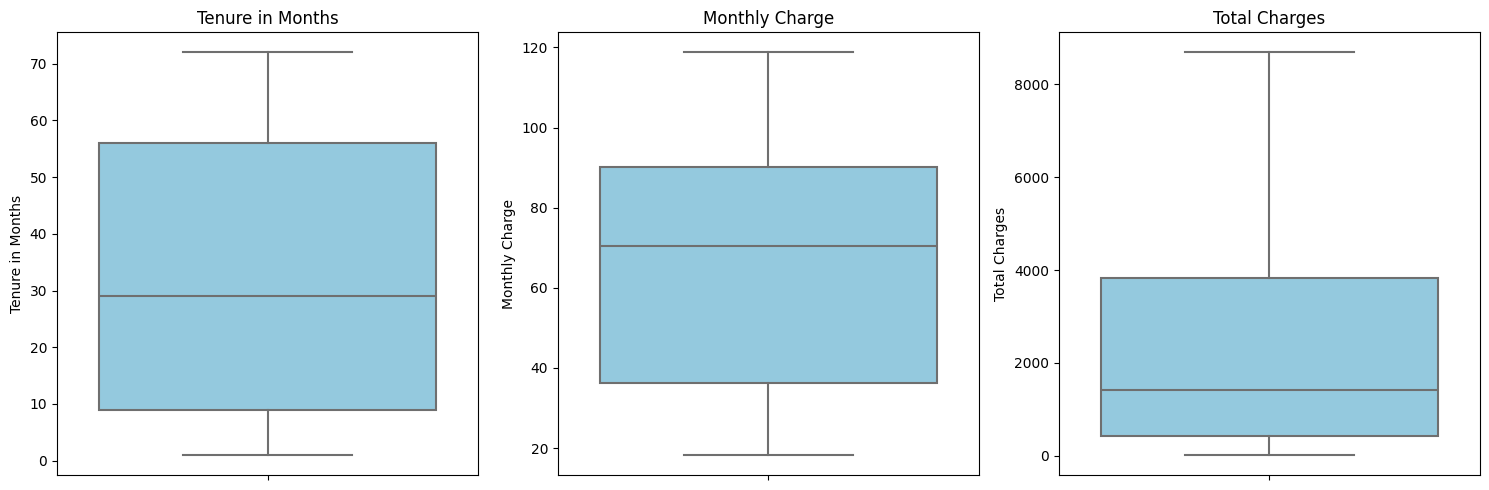

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
sns.boxplot(y='Tenure in Months', data=churn_key_df, ax=axes[0], color='skyblue')
axes[0].set_title('Tenure in Months')

sns.boxplot(y='Monthly Charge', data=churn_key_df, ax=axes[1], color='skyblue')
axes[1].set_title('Monthly Charge')

sns.boxplot(y='Total Charges', data=churn_key_df, ax=axes[2], color='skyblue')
axes[2].set_title('Total Charges')

plt.tight_layout()
plt.show()


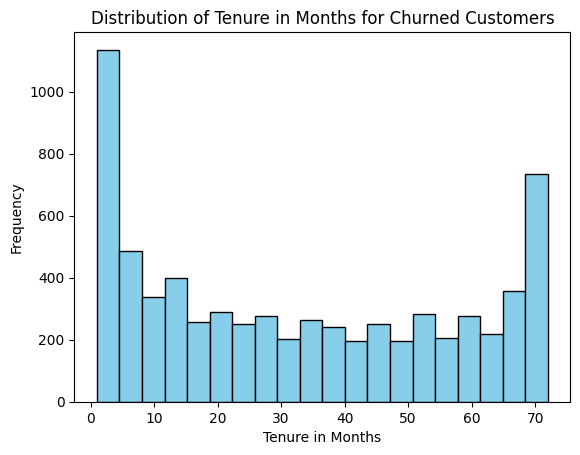

In [26]:
#What is the distribution of ‘Tenure in Months’ for churned customers? 

plt.hist(churn_key_df['Tenure in Months'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Tenure in Months for Churned Customers')
plt.xlabel('Tenure in Months')
plt.ylabel('Frequency')
plt.show()

In [27]:
#What is the churn rate by ‘Internet Service’ type?
churn_rate_by_internet_service = churn_key_df.groupby('Internet Service')['Contract'].apply(lambda x: (x == 'Month-to-Month').mean())
print(churn_rate_by_internet_service*100)

Internet Service
No     32.213845
Yes    55.800593
Name: Contract, dtype: float64


In [28]:
# Calculate churn rate for customers with and without online security
churn_rate_by_online_security = churn_key_df.groupby('Online Security')['Contract'].apply(lambda x: (x == 'Month-to-Month').mean())
print(churn_rate_by_online_security)


Online Security
No     0.580612
Yes    0.329305
Name: Contract, dtype: float64


In [29]:
# Calculate churn rate by contract type
churn_rate_by_contract = churn_key_df.groupby('Contract')['Contract'].apply(lambda x: (x == 'Month-to-Month').mean())
print(churn_rate_by_contract)


Contract
Month-to-Month    1.0
One Year          0.0
Two Year          0.0
Name: Contract, dtype: float64


In [30]:
# Calculate churn rate for customers with and without paperless billing
churn_rate_by_paperless_billing = churn_key_df.groupby('Paperless Billing')['Contract'].apply(lambda x: (x == 'Month-to-Month').mean())
print(churn_rate_by_paperless_billing*100)


Paperless Billing
No     41.741634
Yes    56.943081
Name: Contract, dtype: float64


In [31]:
# churn_key_df.to_csv('churn_df.csv', sep=',', index=False, encoding='utf-8')

<h4>Statiscal testing</h4>

<h5>Hypothesis for 'Internet Service' and 'Online Security':</h5>
Null Hypothesis (H0): There is no association between the type of Internet service and the presence of online security with customer churn.

Alternative Hypothesis (H1): The type of Internet service and the presence of online security are associated with customer churn.


<h5>Hypothesis for 'Contract' and 'Monthly Charge':</h5>
Null Hypothesis (H0): There is no difference in churn rates between customers with different types of contracts (e.g., month-to-month, one year, two years).
Alternative Hypothesis (H1): There is a difference in churn rates between customers with different types of contracts.


<h5>Hypothesis for 'Paperless Billing' and 'Total Charges':</h5>
Null Hypothesis (H0): There is no difference in churn rates between customers with paperless billing and those without paperless billing.

Alternative Hypothesis (H1): There is a difference in churn rates between customers with paperless billing and those without paperless billing.

In [73]:
churn_key_df.columns

Index(['Tenure in Months', 'Offer', 'Monthly Charge', 'Total Charges',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Contract',
       'Paperless Billing', 'Customer Status'],
      dtype='object')

In [74]:
from scipy.stats import chi2_contingency, f_oneway, ttest_ind, mannwhitneyu

# Hypothesis 1: Chi-squared Test of Independence for 'Internet Service' and 'Online Security'
contingency_table = pd.crosstab(churn_key_df['Internet Service'], churn_key_df['Online Security'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print("Chi-squared test p-value:", p)

# Hypothesis 2: Analysis of Variance (ANOVA) for 'Contract' and 'Monthly Charge'
anova_results = f_oneway(churn_key_df[churn_key_df['Contract'] == 'Month-to-Month']['Monthly Charge'],
                         churn_key_df[churn_key_df['Contract'] == 'One Year']['Monthly Charge'],
                         churn_key_df[churn_key_df['Contract'] == 'Two Year']['Monthly Charge'])
print("ANOVA p-value:", anova_results.pvalue)

# Hypothesis 3: Independent Samples t-test or Mann-Whitney U Test for 'Paperless Billing' and 'Total Charges'
group1 = churn_key_df[churn_key_df['Paperless Billing'] == 'Yes']['Total Charges']
group2 = churn_key_df[churn_key_df['Paperless Billing'] == 'No']['Total Charges']
t_test_result = ttest_ind(group1, group2, equal_var=False)  # Independent Samples t-test
mannwhitneyu_result = mannwhitneyu(group1, group2)  # Mann-Whitney U Test

print("Independent Samples t-test p-value:", t_test_result.pvalue)
print("Mann-Whitney U Test p-value:", mannwhitneyu_result.pvalue)


Chi-squared test p-value: 4.8333107992939134e-166
ANOVA p-value: 5.8210914460601094e-05
Independent Samples t-test p-value: 8.151755509732381e-42
Mann-Whitney U Test p-value: 3.922850207948875e-36


In [34]:
import pandas as pd
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(churn_key_df['Customer Status'], churn_key_df['Internet Service'])  

# Print the contingency table
print("Contingency Table:")
print(contingency_table)
print()

# Perform the Chi-square test of independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print()

alpha = 0.05  
if p_value < alpha:
    print("There is a significant association between 'Customer Status' and 'Internet Service'.")
else:
    print("There is no significant association between 'Customer Status' and 'Internet Service'.")


Contingency Table:
Internet Service    No   Yes
Customer Status             
Churned            100  1703
Joined             149   267
Stayed            1210  3426

Chi-square statistic: 383.1704294341026
P-value: 6.245949005288737e-84

There is a significant association between 'Customer Status' and 'Internet Service'.


<h4>Conclusion</h4>
In the historical data, the distribution of customer status indicates that a majority of customers remained with the service, with only a small proportion churning or joining. Analysis reveals that several factors strongly influence customer churn within the telecommunications company. Specifically, the type of Internet service, presence of online security, and type of contract are all statistically significant predictors of churn. Customers with certain types of Internet service, lack of online security, or specific contract types are more likely to churn compared to others.

To mitigate churn rates in the future, the company could consider implementing the following strategies:

<h5>Enhance Internet Service Offerings:</h5>Improve the quality and variety of Internet service options to meet the diverse needs of customers. This could involve upgrading infrastructure, increasing bandwidth, or introducing new technologies.

<h5>Strengthen Online Security Measures:</h5>Invest in robust online security features to instill confidence in customers regarding the safety of their data and online interactions. Implementing advanced security protocols and offering additional security services could help retain customers concerned about privacy and protection.

<h5>Tailor Contract Options:</h5>Provide flexible contract options tailored to individual customer preferences and usage patterns. Offering customizable contract terms, discounts, or loyalty incentives may incentivize customers to stay with the company for longer periods.

<h5>Streamline Paperless Billing Processes:</h5>Simplify and optimize the paperless billing experience to encourage more customers to adopt this convenient payment method. Improving billing transparency, providing automated payment reminders, and offering discounts for paperless billing can incentivize customers to switch to electronic billing methods.
<br></br>
By strategically addressing these key factors identified through data analysis, the telecommunications company can proactively mitigate churn rates and foster greater customer retention in the future.